0 [5.29215704 1.20047163]


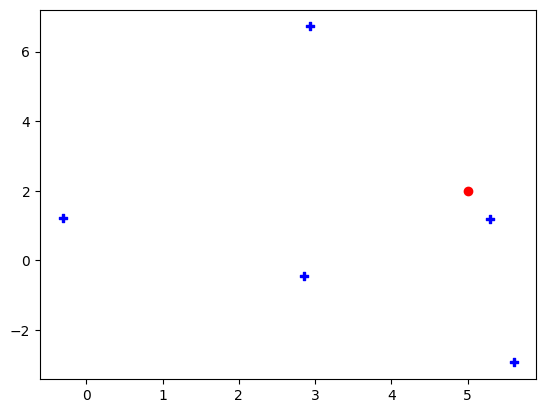

In [43]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

# generate 5 point, with independent normal distributions
# in both x1 and x2 and label them 1-5
n_points = 5
X = np.random.normal(loc=0,scale=3,size=[n_points,2])
y = np.array(range(n_points))+0

# plot the points
plt.scatter(X[:,0],X[:,1],c='b',marker='P')

# define a test point at which we will calculate the nearest neighbour
x_test = np.array([5,2])
plt.scatter(x_test[0], x_test[1],c='red')

# make a function to get the nearest neighbour
def which_nearest(x_test,X):
    n_points, n_dims = X.shape
    # this will contain the shortest distance - set to infinity to start
    shortest_distance = float('inf')
    # this will identify the closet point
    which_point = -1

    for point_cnt in range(n_points):
        # calculate the distance between x_test and X[point_cnt,:]
        current_distance_x = x_test[0]-X[point_cnt,0]
        current_distance_y = x_test[1]-X[point_cnt,1]
        current_distance = np.sqrt(current_distance_y**2+current_distance_x**2)

        if current_distance < shortest_distance:
                which_point = point_cnt
                shortest_distance = current_distance
    return which_point

which_point = which_nearest(x_test,X)
print(which_point, X[which_point,:])


(-5.0, 8.0)

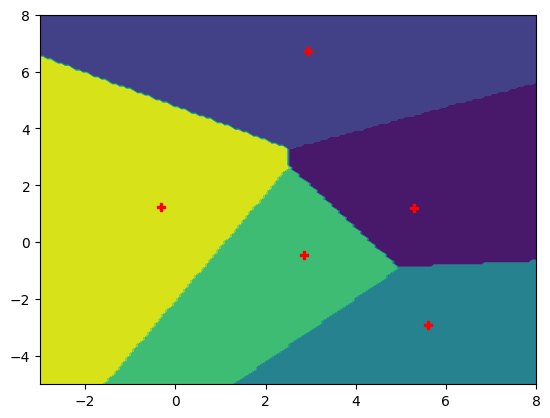

In [61]:
from sklearn.neighbors import KNeighborsClassifier
import tools as tl

Xgrid, x1line, x2line = tl.gen_sample_grid(200,200,8)

near = 1
neigh = KNeighborsClassifier(n_neighbors=near)
neigh.fit(X,y)
data = neigh.predict(Xgrid)
data = np.reshape(data,[200,200])

plt.contourf(x1line,x2line,data)
plt.scatter(X[:,0],X[:,1],c='r',marker='P')
plt.xlim(-3,8)
plt.ylim(-5,8)